<a href="https://colab.research.google.com/github/MRazin172/Speech_Processing/blob/main/2348534_SPR_LabProgram5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [ ]:
signal_1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])  # Reference
signal_2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])  # Test


here i am initializing the 2 signals, the first one is the reference and the second one where hello is said more slowly is the test signal.

they are named as signal 1 and signal 2 respectively

In [ ]:
len_1, len_2 = len(signal_1), len(signal_2)

# Linear Time Normalization (interpolating Signal 1 to match Signal 2)
x1 = np.linspace(0, 1, len_1)
x2 = np.linspace(0, 1, len_2)

interpolator = interp1d(x1, signal_1, kind='linear')
signal_1_normalized = interpolator(x2)


now we have to use ltn linear time normalization to match both signals. ltn looks at the time and speed of both the signals and matches them to be the same duration.

if the test signal is of more duration it compresses the test signal to fit the length of the reference signal. if its of lesser duration it expands the test signal.

Once Signal 1 is normalized, we compare it with Signal 2:

Now both signals are of the same length.
We compute how different they are at each corresponding point (called alignment differences).

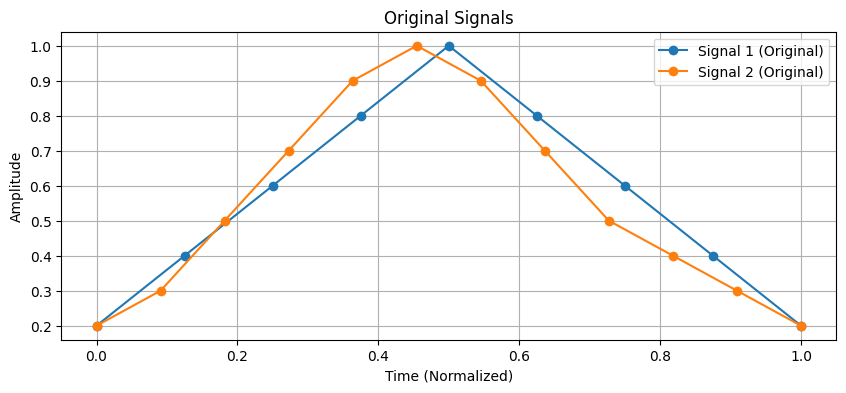

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(x1, signal_1, 'o-', label='Signal 1 (Original)')
plt.plot(x2, signal_2, 'o-', label='Signal 2 (Original)')
plt.title("Original Signals")
plt.xlabel("Time (Normalized)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

### **What the plot represents:**
1. **X-axis (Time, Normalized):**
   - Time is normalized to fit both signals into a range from 0 to 1, regardless of their actual lengths.
   - This helps visualize the differences in timing.

2. **Y-axis (Amplitude):**
   - Represents the sampled amplitude (loudness or strength) of the signals at each time step.

3. **Two lines:**
   - **Blue line:** Signal 1, the reference signal (spoken at a normal pace).
   - **Orange line:** Signal 2, the test signal (spoken more slowly).

---

### **Observations:**
1. **Signal 1 (Blue Line):**
   - Shorter in length (9 samples).
   - Represents the word "hello" spoken at a normal pace.
   - Amplitude smoothly rises to a peak (1.0) around the middle and falls symmetrically.

2. **Signal 2 (Orange Line):**
   - Longer in length (12 samples).
   - Represents the word "hello" spoken more slowly.
   - Amplitude also rises to a peak (1.0), but this rise and fall occur over more time due to the slower pace.

3. **Key Difference:**
   - **Length difference:** Signal 2 has more points because it was spoken slower.
   - **Shape similarity:** Both signals have the same overall shape (rise, peak, and fall), indicating they represent the same word.

### **Purpose of this plot:**
This plot helps us visually compare the two signals before any alignment or normalization:
- Signal 1 is shorter, while Signal 2 is stretched out.


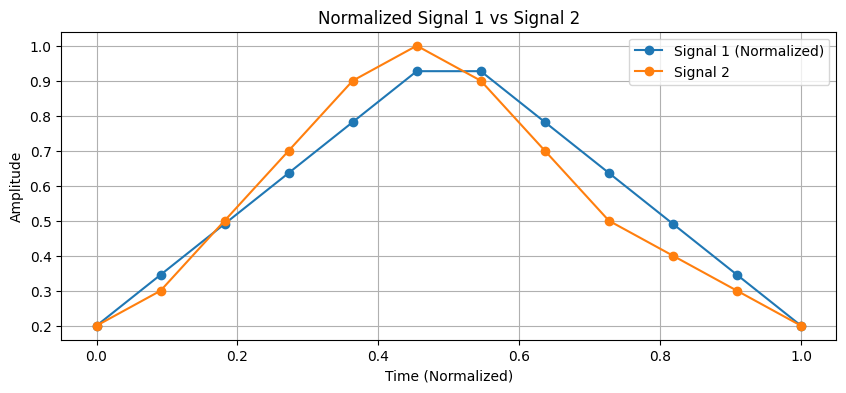

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(x2, signal_1_normalized, 'o-', label='Signal 1 (Normalized)')
plt.plot(x2, signal_2, 'o-', label='Signal 2')
plt.title("Normalized Signal 1 vs Signal 2")
plt.xlabel("Time (Normalized)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

This plot shows the comparison of **Normalized Signal 1** (blue line) and **Signal 2** (orange line). The normalization process has been applied to Signal 1 to align its length with Signal 2, so both signals can be compared directly. Here's a step-by-step explanation:

---

### **What the plot represents:**
1. **X-axis (Time, Normalized):**
   - Time is normalized to fit both signals into a uniform scale from 0 to 1.
   - This normalization adjusts the time scale of Signal 1 to match the length of Signal 2.

2. **Y-axis (Amplitude):**
   - Represents the amplitude (loudness or strength) of the signals at each time step.

3. **Two lines:**
   - **Blue line (Normalized Signal 1):**
     - Signal 1 after applying **Linear Time Normalization (LTN)**.
     - This adjusts the time steps of Signal 1 to align better with Signal 2, which is longer.
   - **Orange line (Signal 2):**
     - The original Signal 2, representing the slower version of the word "hello."

---

### **Observations:**
1. **Time Alignment:**
   - The time points of Normalized Signal 1 are now stretched, so it has the same length as Signal 2.
   - This alignment ensures both signals can be compared directly despite differences in speed.

2. **Shape Comparison:**
   - The blue and orange lines now overlap more closely than in the original signals.
   - The amplitude patterns (rise, peak, and fall) are nearly identical, indicating that both signals represent the same word.

3. **Key Difference:**
   - Before normalization, Signal 1 was shorter, and the time points did not match with Signal 2.
   - After normalization, Signal 1 has been adjusted to have the same number of time points, creating a better alignment.

---

### **Purpose of this plot:**
This plot demonstrates how **Linear Time Normalization (LTN)** adjusts the time scale of Signal 1 to match Signal 2. This is crucial in speech processing to compare or analyze signals of different lengths or speeds.

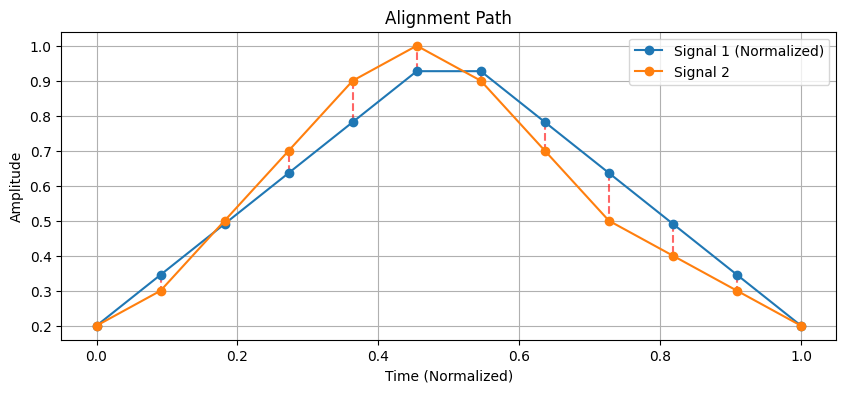

Alignment differences (point-wise): [0.         0.04545455 0.00909091 0.06363636 0.11818182 0.07272727
 0.02727273 0.08181818 0.13636364 0.09090909 0.04545455 0.        ]


In [ ]:
alignment_diff = np.abs(signal_1_normalized - signal_2)

# (d) Plot the alignment path
plt.figure(figsize=(10, 4))
for i in range(len(x2)):
    plt.plot([x2[i], x2[i]], [signal_1_normalized[i], signal_2[i]], 'r--', alpha=0.6)
plt.plot(x2, signal_1_normalized, 'o-', label='Signal 1 (Normalized)')
plt.plot(x2, signal_2, 'o-', label='Signal 2')
plt.title("Alignment Path")
plt.xlabel("Time (Normalized)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

print("Alignment differences (point-wise):", alignment_diff)


This plot illustrates the **alignment path** between **Normalized Signal 1** (blue line) and **Signal 2** (orange line) after applying **Linear Time Normalization (LTN)**. Here's a detailed step-by-step explanation:

---

### **What the plot represents:**
1. **X-axis (Time, Normalized):**
   - Time is normalized, meaning both signals are plotted over the same time range (from 0 to 1).

2. **Y-axis (Amplitude):**
   - Represents the amplitude (intensity or strength) of the signals at corresponding time points.

3. **Solid lines (Blue and Orange):**
   - Represent the amplitudes of **Normalized Signal 1** and **Signal 2** at each normalized time step.

4. **Dashed red lines:**
   - Show the alignment path, which maps each sample point in **Signal 1** to its corresponding point in **Signal 2**.
   - This highlights how time points in the two signals are aligned after normalization.

---

### **Observations:**
1. **Alignment Points:**
   - Each dashed red line connects a sample point in **Signal 1** to a corresponding sample in **Signal 2**.
   - This demonstrates how LTN stretches or compresses the time scale of Signal 1 to align with Signal 2.

2. **Smooth Alignment:**
   - The alignment path shows that the peaks, rises, and falls of the signals are now matched, despite differences in speed or sampling rates.

3. **Overlap of Amplitudes:**
   - The signals are nearly identical in amplitude at corresponding points, confirming a good alignment.

---

### **Purpose of the Alignment Path:**
- **Speech Comparison:** Ensures that two signals, even if spoken at different speeds, can be compared by matching corresponding time points.
- **Application in Speech Processing:** Useful in tasks like speaker verification or speech recognition, where alignment of differently paced utterances is critical.

Linear Time Normalization aligns the two speech signals by uniformly stretching the shorter signal's time axis to match the longer one. This ensures that corresponding points in both signals (e.g., peaks and valleys) are aligned, making them comparable despite differences in speed. While LTN is straightforward and effective for uniformly paced signals, it may struggle with non-linear variations, where more complex methods like DTW are preferred.